# **Introduzione al Machine Learning -- laboratorio 23--24**

* Analisi della varianza
* Test del chi-quadro

In [49]:
!pip install ucimlrepo

In [50]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [51]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = X.copy()
data['class'] = y['class']
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
fg = data.groupby('class')
fg

In [57]:
for x in fg:
  print(x)

('Iris-setosa',     sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13  

In [58]:
for v, g in fg:
  print(v)
  print(g)

Iris-setosa
    sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13      

In [59]:
fg.describe()

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

                 count   mean       std  min  25%  50%  75%  max
class                                                           
Iris-setosa       50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
Iris-versicolor   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
Iris-virginica    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5


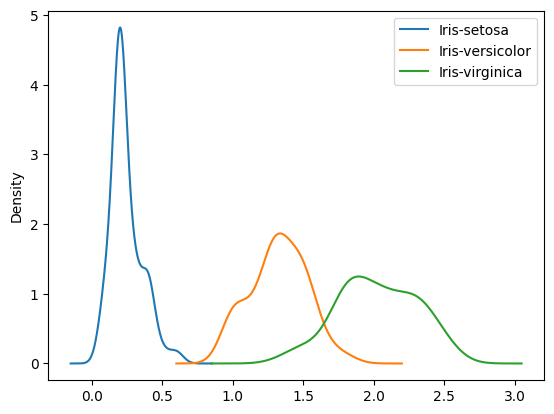

In [60]:
pwg = fg['petal width']
print(pwg.describe())
pwg.plot(kind='kde')
plt.legend()
plt.show()

Visto che le varianze non sono molto simili e sembrano proporzionali alle medie, provo a usare una trasformazione nonlineare per ottenere un modello migliore.

                 count      mean       std       min       25%       50%  \
class                                                                      
Iris-setosa       50.0 -1.498512  0.424457 -2.302585 -1.609438 -1.609438   
Iris-versicolor   50.0  0.270933  0.152821  0.000000  0.182322  0.262364   
Iris-virginica    50.0  0.696748  0.139274  0.336472  0.587787  0.693147   

                      75%       max  
class                                
Iris-setosa     -1.203973 -0.510826  
Iris-versicolor  0.405465  0.587787  
Iris-virginica   0.832909  0.916291  


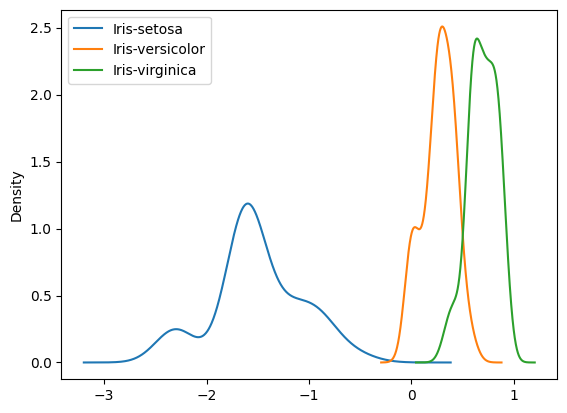

In [61]:
lpw = pd.DataFrame()
lpw['lpw'] = np.log(data['petal width'])
lpw['class'] = data['class']

lpwg = lpw.groupby('class')['lpw']

# lpwg = fg['petal width'].log()
print(lpwg.describe())
lpwg.plot(kind='kde')
plt.legend()
plt.show()

                 count      mean       std       min       25%       50%  \
class                                                                      
Iris-setosa       50.0  0.483246  0.103378  0.316228  0.447214  0.447214   
Iris-versicolor   50.0  1.148322  0.086639  1.000000  1.095445  1.140175   
Iris-virginica    50.0  1.420099  0.097513  1.183216  1.341641  1.414214   

                      75%       max  
class                                
Iris-setosa      0.547723  0.774597  
Iris-versicolor  1.224745  1.341641  
Iris-virginica   1.516575  1.581139  


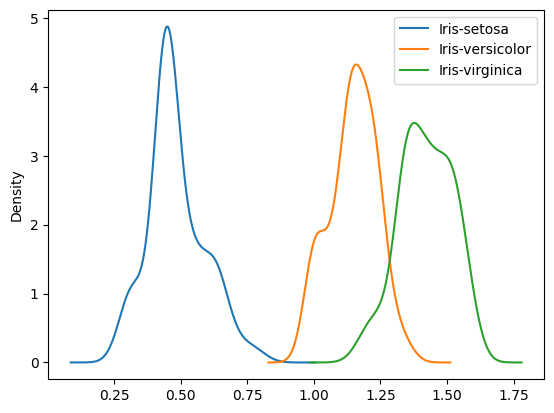

In [62]:
spw = pd.DataFrame()
spw['spw'] = np.sqrt(data['petal width'])
spw['class'] = data['class']

spwg = spw.groupby('class')['spw']

print(spwg.describe())
spwg.plot(kind='kde')
plt.legend()
plt.show()

In [63]:
spwg.mean()

class
Iris-setosa        0.483246
Iris-versicolor    1.148322
Iris-virginica     1.420099
Name: spw, dtype: float64

In [64]:
spwg.std()

class
Iris-setosa        0.103378
Iris-versicolor    0.086639
Iris-virginica     0.097513
Name: spw, dtype: float64

In [65]:
spwg.var()

class
Iris-setosa        0.010687
Iris-versicolor    0.007506
Iris-virginica     0.009509
Name: spw, dtype: float64

In [66]:
spwg.count()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: spw, dtype: int64

In [67]:
n = len(data)
n

150

In [68]:
m = len(spwg)
m

3

In [69]:
Sw = Sp = np.sqrt(spwg.var().mean())
Sw

0.09609412317492814

In [70]:
SSw = Sw**2 * (n-m)
SSw

1.3574098347874644

In [71]:
SSy = spw['spw'].var() * (n-1)
SSy

24.588790648616722

In [72]:
SSb = SSy - SSw
SSb

23.231380813829258

In [73]:
Sb = np.sqrt(SSb / (m-1))
Sb

3.40817992584233

In [74]:
print(f'Stima corretta della deviazione standard: {Sw:g}')
print(f'Stima della deviazione standard "between": {Sb:g}')

Stima corretta della deviazione standard: 0.0960941
Stima della deviazione standard "between": 3.40818


In [75]:
D = Sb**2 / Sw**2
D

1257.9152191598807

In [76]:
from scipy.stats import f

p_value = f.sf(D, dfn=m-1, dfd=n-m)
p_value

3.4282771526868135e-93

In [77]:
from scipy.stats import f_oneway

f_oneway(*[x.values for (_, x) in list(spwg)])

F_onewayResult(statistic=1257.9152191598805, pvalue=3.4282771526868454e-93)

In [78]:
list(spwg)

[('Iris-setosa',
  0     0.447214
  1     0.447214
  2     0.447214
  3     0.447214
  4     0.447214
  5     0.632456
  6     0.547723
  7     0.447214
  8     0.447214
  9     0.316228
  10    0.447214
  11    0.447214
  12    0.316228
  13    0.316228
  14    0.447214
  15    0.632456
  16    0.632456
  17    0.547723
  18    0.547723
  19    0.547723
  20    0.447214
  21    0.632456
  22    0.447214
  23    0.707107
  24    0.447214
  25    0.447214
  26    0.632456
  27    0.447214
  28    0.447214
  29    0.447214
  30    0.447214
  31    0.632456
  32    0.316228
  33    0.447214
  34    0.316228
  35    0.447214
  36    0.447214
  37    0.316228
  38    0.447214
  39    0.447214
  40    0.547723
  41    0.547723
  42    0.447214
  43    0.774597
  44    0.632456
  45    0.547723
  46    0.447214
  47    0.447214
  48    0.447214
  49    0.447214
  Name: spw, dtype: float64),
 ('Iris-versicolor',
  50    1.183216
  51    1.224745
  52    1.224745
  53    1.140175
  54    1.2247

In [79]:
[x.values for (_, x) in list(spwg)]

[array([0.4472136 , 0.4472136 , 0.4472136 , 0.4472136 , 0.4472136 ,
        0.63245553, 0.54772256, 0.4472136 , 0.4472136 , 0.31622777,
        0.4472136 , 0.4472136 , 0.31622777, 0.31622777, 0.4472136 ,
        0.63245553, 0.63245553, 0.54772256, 0.54772256, 0.54772256,
        0.4472136 , 0.63245553, 0.4472136 , 0.70710678, 0.4472136 ,
        0.4472136 , 0.63245553, 0.4472136 , 0.4472136 , 0.4472136 ,
        0.4472136 , 0.63245553, 0.31622777, 0.4472136 , 0.31622777,
        0.4472136 , 0.4472136 , 0.31622777, 0.4472136 , 0.4472136 ,
        0.54772256, 0.54772256, 0.4472136 , 0.77459667, 0.63245553,
        0.54772256, 0.4472136 , 0.4472136 , 0.4472136 , 0.4472136 ]),
 array([1.18321596, 1.22474487, 1.22474487, 1.14017543, 1.22474487,
        1.14017543, 1.26491106, 1.        , 1.14017543, 1.18321596,
        1.        , 1.22474487, 1.        , 1.18321596, 1.14017543,
        1.18321596, 1.22474487, 1.        , 1.22474487, 1.04880885,
        1.34164079, 1.14017543, 1.22474487, 1.

In [84]:
data = np.sqrt(X) # In realtà non so se va bene anche per le altre variabili
data['class'] = y['class']
data = data.rename(columns={"class": "category"})
data = data.rename(columns={"petal length": "petal_length"})
data = data.rename(columns={"petal width": "petal_width"})
data = data.rename(columns={"sepal length": "sepal_length"})
data = data.rename(columns={"sepal width": "sepal_width"})
data

,sepal_length,sepal_width,petal_length,petal_width,category
0,2.258318,1.870829,1.183216,0.447214,Iris-setosa
1,2.213594,1.732051,1.183216,0.447214,Iris-setosa
2,2.167948,1.788854,1.140175,0.447214,Iris-setosa
3,2.144761,1.760682,1.224745,0.447214,Iris-setosa
4,2.236068,1.897367,1.183216,0.447214,Iris-setosa
...,...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575,Iris-virginica
146,2.509980,1.581139,2.236068,1.378405,Iris-virginica
147,2.549510,1.732051,2.280351,1.414214,Iris-virginica
148,2.489980,1.843909,2.323790,1.516575,Iris-virginica


In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print(ols('petal_width ~ C(category, Sum)', data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.43e-93
Time:                        13:25:11   Log-Likelihood:                 140.04
No. Observations:                 150   AIC:                            -274.1
Df Residuals:                     147   BIC:                            -265.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [86]:
print(ols('petal_width ~ C(category)', data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.43e-93
Time:                        13:28:09   Log-Likelihood:                 140.04
No. Observations:                 150   AIC:                            -274.1
Df Residuals:                     147   BIC:                            -265.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [87]:
ols('petal_width ~ C(category)', data=data).fit().params

Intercept                         0.483246
C(category)[T.Iris-versicolor]    0.665076
C(category)[T.Iris-virginica]     0.936853
dtype: float64

In [88]:
spwg.mean()

class
Iris-setosa        0.483246
Iris-versicolor    1.148322
Iris-virginica     1.420099
Name: spw, dtype: float64

In [89]:
global_avg = spwg.mean().mean()
global_avg

1.017222392437312

In [92]:
spwg.mean() - global_avg

class
Iris-setosa       -0.533976
Iris-versicolor    0.131100
Iris-virginica     0.402877
Name: spw, dtype: float64

In [91]:
ols('petal_width ~ C(category, Sum)', data=data).fit().params

Intercept                              1.017222
C(category, Sum)[S.Iris-setosa]       -0.533976
C(category, Sum)[S.Iris-versicolor]    0.131100
dtype: float64

In [94]:
from statsmodels.stats.anova import anova_lm

model = ols('petal_width ~ C(category, Sum)', data=data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
"C(category, Sum)",2.0,23.231381,11.615690,1257.915219,3.428277e-93
Residual,147.0,1.357410,0.009234,NaN,NaN


## Anova a due vie

In [95]:
!pip install pingouin

In [96]:
import pingouin as pg

df = pg.read_dataset('anova2')
df

,Ss,Blend,Crop,Yield
0,1,Blend X,Wheat,123
1,2,Blend X,Wheat,156
2,3,Blend X,Wheat,112
3,4,Blend X,Wheat,100
4,5,Blend X,Corn,128
5,6,Blend X,Corn,150
6,7,Blend X,Corn,174
7,8,Blend X,Corn,116
8,9,Blend X,Soy,166
9,10,Blend X,Soy,178


In [97]:
dfg = df.groupby(['Blend', 'Crop'])['Yield']
dfg.describe()

count    mean        std    min     25%    50%     75%    max
Blend   Crop                                                                
Blend X Corn     4.0  142.00  25.560386  116.0  125.00  139.0  156.00  174.0
        Soy      4.0  171.00  14.764823  153.0  162.75  172.0  180.25  187.0
        Wheat    4.0  122.75  24.074537  100.0  109.00  117.5  131.25  156.0
Blend Y Corn     4.0  153.50  32.501282  120.0  129.00  153.5  178.00  187.0
        Soy      4.0  143.75  11.701140  131.0  137.75  142.5  148.50  159.0
        Wheat    4.0  140.25  24.635679  120.0  127.50  132.5  145.25  176.0

In [98]:
dfg.mean()

Blend    Crop 
Blend X  Corn     142.00
         Soy      171.00
         Wheat    122.75
Blend Y  Corn     153.50
         Soy      143.75
         Wheat    140.25
Name: Yield, dtype: float64

In [99]:
df.anova(dv="Yield", between=["Blend", "Crop"])

,Source,SS,DF,MS,F,p-unc,np2
0,Blend,2.041667,1,2.041667,0.003768,0.951730,0.000209
1,Crop,2736.583333,2,1368.291667,2.525235,0.107978,0.219105
2,Blend * Crop,2360.083333,2,1180.041667,2.177813,0.142223,0.194834
3,Residual,9753.250000,18,541.847222,NaN,NaN,NaN


In [101]:
model_2way = ols('Yield ~ C(Blend, Sum) * C(Crop, Sum)', data=df).fit()
print(model_2way.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     1.882
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.148
Time:                        13:53:21   Log-Likelihood:                -106.14
No. Observations:                  24   AIC:                             224.3
Df Residuals:                      18   BIC:                             231.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [103]:
print(anova_lm(model_2way))

                              df       sum_sq      mean_sq         F    PR(>F)
C(Blend, Sum)                1.0     2.041667     2.041667  0.003768  0.951730
C(Crop, Sum)                 2.0  2736.583333  1368.291667  2.525235  0.107978
C(Blend, Sum):C(Crop, Sum)   2.0  2360.083333  1180.041667  2.177813  0.142223
Residual                    18.0  9753.250000   541.847222       NaN       NaN


In [104]:
norep = dfg.mean()
norep

Blend    Crop 
Blend X  Corn     142.00
         Soy      171.00
         Wheat    122.75
Blend Y  Corn     153.50
         Soy      143.75
         Wheat    140.25
Name: Yield, dtype: float64

In [105]:
pd.DataFrame(norep)

Yield
Blend   Crop         
Blend X Corn   142.00
        Soy    171.00
        Wheat  122.75
Blend Y Corn   153.50
        Soy    143.75
        Wheat  140.25

In [106]:
norep.unstack()

Crop,Corn,Soy,Wheat
Blend,,,
Blend X,142.0,171.00,122.75
Blend Y,153.5,143.75,140.25


In [107]:
norep.reset_index()

,Blend,Crop,Yield
0,Blend X,Corn,142.00
1,Blend X,Soy,171.00
2,Blend X,Wheat,122.75
3,Blend Y,Corn,153.50
4,Blend Y,Soy,143.75
5,Blend Y,Wheat,140.25


In [108]:
# Pingouin non va bene: vuole le repliche per forza

norep.reset_index().anova(dv="Yield", between=["Blend", "Crop"])

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Blend,0.510417,1,0.510417,1.0
1,Crop,684.145833,2,342.072917,1.0
2,Blend * Crop,590.020833,2,295.010417,1.0
3,Residual,0.000000,0,NaN,NaN


In [111]:
model_norep = ols('Yield ~ C(Blend, Sum) + C(Crop, Sum)', data=norep.reset_index()).fit()
print(model_norep.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                 -0.157
Method:                 Least Squares   F-statistic:                    0.7736
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.606
Time:                        13:58:05   Log-Likelihood:                -22.279
No. Observations:                   6   AIC:                             52.56
Df Residuals:                       2   BIC:                             51.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [112]:
anova_lm(model_norep)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Blend, Sum)",1.0,0.510417,0.510417,0.001730,0.970600
"C(Crop, Sum)",2.0,684.145833,342.072917,1.159528,0.463064
Residual,2.0,590.020833,295.010417,NaN,NaN


In [115]:
anova_lm(ols('Yield ~ C(Crop, Sum)', data=norep.reset_index()).fit())

,df,sum_sq,mean_sq,F,PR(>F)
"C(Crop, Sum)",2.0,684.145833,342.072917,1.737789,0.315329
Residual,3.0,590.531250,196.843750,NaN,NaN


## Test del chi-quadro

In [117]:
lotto = pd.read_excel('archilotto_raw.xlsx', index_col=0)
lotto

,BA,BA.1,BA.2,BA.3,BA.4,CA,CA.1,CA.2,CA.3,CA.4,...,SUP.4,SUP.5,JOLLY,SUPERS,1° LOT SUP,2° LOT SUP,3° LOT SUP,4° LOT SUP,5° LOT SUP,6° LOT SUP
DATA,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-05,87.0,34.0,1.0,59.0,50.0,18.0,17.0,45.0,49.0,82.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-13,6.0,66.0,1.0,16.0,48.0,40.0,60.0,32.0,50.0,80.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-20,38.0,14.0,24.0,78.0,36.0,25.0,87.0,63.0,23.0,88.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-27,49.0,30.0,87.0,15.0,65.0,39.0,81.0,84.0,89.0,69.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-04,83.0,21.0,26.0,86.0,59.0,66.0,42.0,43.0,56.0,69.0,...,42.0,51.0,80.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07,51.0,83.0,60.0,59.0,90.0,64.0,70.0,58.0,2.0,16.0,...,74.0,79.0,70.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,8.0,55.0,77.0,76.0,21.0,17.0,62.0,32.0,22.0,80.0,...,89.0,80.0,71.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
lotto = lotto.drop(index='NaT')
lotto = lotto[[col for col in lotto.columns if col.startswith('CA')]]
lotto

,CA,CA.1,CA.2,CA.3,CA.4
DATA,,,,,
1945-01-05,18.0,17.0,45.0,49.0,82.0
1945-01-13,40.0,60.0,32.0,50.0,80.0
1945-01-20,25.0,87.0,63.0,23.0,88.0
1945-01-27,39.0,81.0,84.0,89.0,69.0
1945-02-03,19.0,70.0,4.0,79.0,7.0
...,...,...,...,...,...
2010-12-04,66.0,42.0,43.0,56.0,69.0
2010-12-07,64.0,70.0,58.0,2.0,16.0
2010-12-09,17.0,62.0,32.0,22.0,80.0


In [120]:
lotto = pd.DataFrame(lotto, dtype=int)
lotto

,CA,CA.1,CA.2,CA.3,CA.4
DATA,,,,,
1945-01-05,18,17,45,49,82
1945-01-13,40,60,32,50,80
1945-01-20,25,87,63,23,88
1945-01-27,39,81,84,89,69
1945-02-03,19,70,4,79,7
...,...,...,...,...,...
2010-12-04,66,42,43,56,69
2010-12-07,64,70,58,2,16
2010-12-09,17,62,32,22,80


In [121]:
from scipy.stats import describe

vals = lotto.values.flatten()
describe(vals)

DescribeResult(nobs=22265, minmax=(0, 90), mean=46.5820345834269, variance=685.5867954470614, skewness=-0.05072221578333324, kurtosis=-1.213617084385487)

In [122]:
np.sum(vals == 0)

10

In [123]:
vals = vals[vals > 0]

In [124]:
describe(vals)

DescribeResult(nobs=22255, minmax=(1, 90), mean=46.60296562570209, variance=684.9193764837199, skewness=-0.0506846481536701, kurtosis=-1.2136815818748647)

In [125]:
counts = np.histogram(vals, bins=90)
counts

(array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
        237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
        228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
        240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
        269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
        237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
        264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268]),
 array([ 1.        ,  1.98888889,  2.97777778,  3.96666667,  4.95555556,
         5.94444444,  6.93333333,  7.92222222,  8.91111111,  9.9       ,
        10.88888889, 11.87777778, 12.86666667, 13.85555556, 14.84444444,
        15.83333333, 16.82222222, 17.81111111, 18.8       , 19.78888889,
        20.77777778, 21.76666667, 22.75555556, 23.74444444, 24.73333333,
        25.72222222, 26.71111111, 27.7       , 28.68888889, 29.67777778,
        30.66666667, 31.65555556, 32.64444444, 33.6333

In [128]:
counts = np.histogram(vals, bins=list(range(1, 92)))
counts

(array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
        237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
        228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
        240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
        269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
        237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
        264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91]))

In [129]:
obs, _ = counts
obs

array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
       237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
       228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
       240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
       269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
       237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
       264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268])

In [130]:
len(obs)

90

In [131]:
sum(obs)

22255

In [132]:
n = len(vals)
n

22255

In [133]:
from scipy.stats import chisquare

chisquare(obs)

Power_divergenceResult(statistic=118.9757357897102, pvalue=0.018600415647305628)

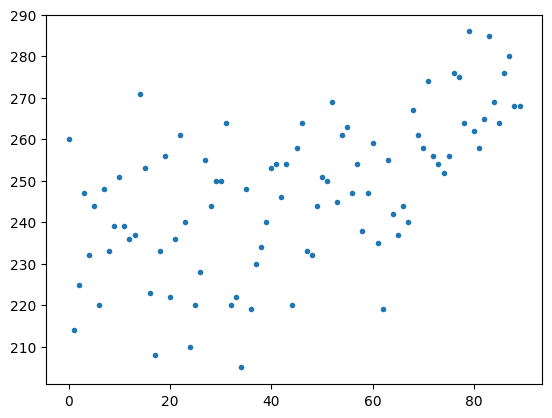

In [140]:
plt.plot(obs, '.')
# plt.ylim([0, 300])
plt.show()

In [137]:
counts2 = np.histogram(vals, bins=[0.5, 30.5, 60.5, 90.5])
counts2

(array([7135, 7315, 7805]), array([ 0.5, 30.5, 60.5, 90.5]))

In [138]:
chisquare(counts2[0])

Power_divergenceResult(statistic=32.41518759829252, pvalue=9.143899584010899e-08)

## Test di Gaussianità

In [146]:
sample = X[y['class']=='Iris-setosa']['sepal length']
sample

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length, dtype: float64

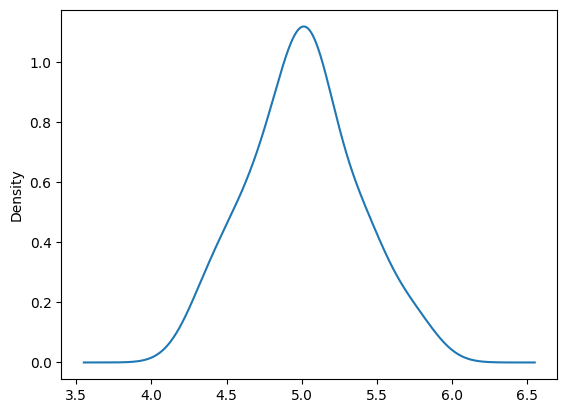

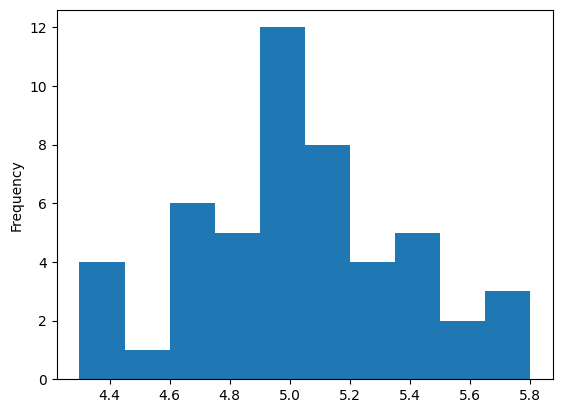

In [150]:
sample.plot(kind='kde')
plt.show()
sample.plot(kind='hist')
plt.show()

In [153]:
mu = sample.mean()
sigma = sample.std()
(mu, sigma)

(5.006, 0.35248968721345136)

In [154]:
k = 5

In [161]:
from scipy.stats import norm

di = norm(loc=mu, scale=sigma)
np.arange(1, k)/k

array([0.2, 0.4, 0.6, 0.8])

In [170]:
edges = di.ppf(np.arange(1, k)/k)
edges = np.array([0] + list(edges) + [10])
edges

array([ 0.        ,  4.70933719,  4.91669776,  5.09530224,  5.30266281,
       10.        ])

In [172]:
obsg, _ = np.histogram(sample, bins=edges)
obsg

array([11,  9,  8, 12, 10])

In [174]:
chisquare(obsg, ddof=2)

Power_divergenceResult(statistic=1.0, pvalue=0.6065306597126334)

Questo campione è compatibile con l'ipotesi di Gaussianità.